# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Jorge Augusto von Bismark Ehrhardt </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import *

In [11]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [12]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [13]:
df['Hemisfério'] = pd.cut(df.Latitude, bins=(-90,0,90), labels = ["Sul","Norte"])
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

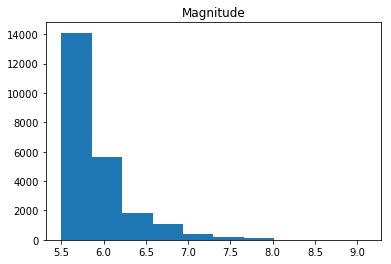

In [14]:
plt.hist(df.Magnitude)
plt.title("Magnitude")

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [17]:
mu, sigma = expon.fit(df["Magnitude"])
print(mu, sigma)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

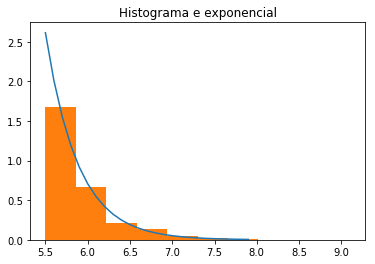

In [21]:
plt.plot(np.arange(5.5,8,0.1), expon.pdf(np.arange(5.5,8,0.1),loc=mu, scale=sigma))
plt.hist(df.Magnitude, normed=True)
plt.title("Histograma ")
#NORMAL ->   loc = média / scale = DesvPad

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [12]:
douglas = pd.crosstab(df.Type, df.Hemisfério, normalize = True)
douglas

Hemisfério,Sul,Norte
Type,,
Earthquake,0.545191,0.447121
Explosion,0.000085,0.000085
Nuclear Explosion,0.001196,0.006279
Rock Burst,0.000043,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [34]:
prob_norte = len(df[(df["Hemisfério"]=="Norte") & (df["Type"]=="Earthquake")])
prob_total = len(df[df["Type"]=="Earthquake"])

prob_final = prob_norte / prob_total
prob_final

0.4505853994490358

Explique o seu raciocínio

    A probabilidade de acontecer um terremoto no hemisfério norte será igual ao número de terremotos ocorridos no norte dividido pelo número total de terremotos no globo todo

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [38]:
prob_hem = df.groupby('Hemisfério').size().div(len(df))
#print(prob_hem)

#groupby agrupa uma coluna do dataframe conforme seu valor correspondente em outra coluna:
df3 = df.groupby(['Type', 'Hemisfério']).size().div(len(df)).div(prob_hem, axis = 0, level = 'Hemisfério')
df3

Type               Hemisfério
Earthquake         Sul           0.997577
                   Norte         0.985966
Explosion          Sul           0.000156
                   Norte         0.000188
Nuclear Explosion  Sul           0.002188
                   Norte         0.013846
Rock Burst         Sul           0.000078
dtype: float64

In [39]:
df3.loc[('Nuclear Explosion'),('Norte')]

0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [74]:
prob_norte = len(df[(df["Hemisfério"]=="Norte")])

#P(Earquake/Norte) = P(Earthquake ∩ Norte)/P(Norte)
print('A probabilidade de ter ocorrido uma Explosão nuclear, sendo que o analisado foi o norte é de {}'.format(0.013846/prob_norte))

A probabilidade de ter ocorrido uma Explosão nuclear, sendo que o analisado foi o norte é de 1.3041348780258076e-06


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

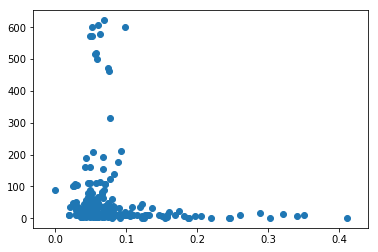

In [45]:
plt.scatter(df["Magnitude Error"], df.Depth)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [46]:
df["Magnitude Error"].corr(df["Depth"])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

    O valor 0.0769... indica que há uma correlação baixa entre as duas variáveis, já que esse valor se distancia consideravelmente de 1, que representaria uma correlação perfeita. Já o fato de ser negativo aponta que conforme uma das variáveis cresce, a outra decresce.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

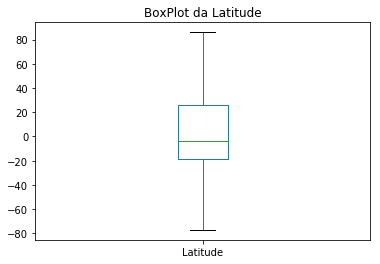

In [53]:
df.Latitude.describe()
df.Latitude.plot(kind='box', title='BoxPlot da Latitude')

    O gráfico acima representa a frequência da ocorrência de terremotos nas suas respectivas latitudes, sendo a mediana desses valores representada pela linha verde entre o primeiro e terceiro quartis (25% e 75% dos dados, respectivamente).
    
    Sendo que a "box" se encontra próxima do centro do eixo Y, é possível dizer que esses dados são bem simétricos, significando que estão dispersos parecidamente entre os valores positivos e negativos.

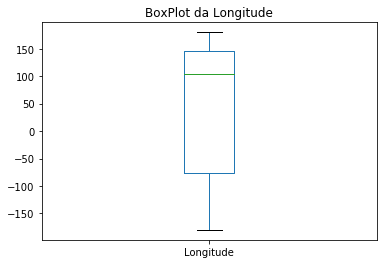

In [54]:
df.Longitude.describe()
df.Longitude.plot(kind='box', title='BoxPlot da Longitude')

    O gráfico acima representa a frequência da ocorrência de terremotos nas suas respectivas longitudes, sendo a mediana desses valores representada pela linha verde entre o primeiro e terceiro quartis (25% e 75% dos dados, respectivamente).

    Ao contrário do gráfico da latitude, este se encontra mais deslocado do centro do eixo Y e portanto apresenta um grau de simetria menor, indicando que ocorrem mais terremotos em longitudes positivas, pois a maior parte dos valores intra-quartis se dispõem acima do 0.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [86]:
prob_N = len(df[(df["Hemisfério"]=="Norte") & (df["Type"]=="Nuclear Explosion") & (df["Magnitude Type"]=="MB")])/len(df[df["Hemisfério"]=="Norte"])

print(prob_N)

prob_S = len(df[(df["Hemisfério"]=="Sul") & (df["Type"]=="Nuclear Explosion") & (df["Magnitude Type"]=="MB")])/len(df[df["Hemisfério"]=="Sul"])

prob_S

0.012715456343599886


0.002188354826103947

    A probabilidade de um lugar ter sofrito uma explosão nuclear de tipo MB é maior no norte.